In [1]:
%cd ..
%pip install -e .

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
Obtaining file:///home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14


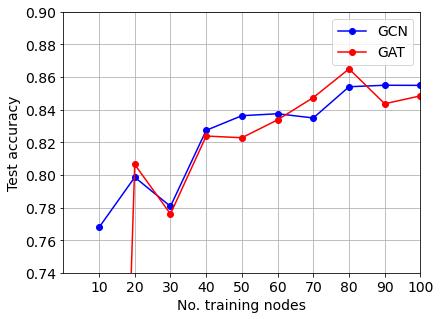

In [65]:
# fig2a
df = pd.read_csv('reports/figures/fig2a.csv')
fig, ax = plt.subplots(figsize=(6.4,4.8))

filt = (df['model'] == 'gcn')
ax.plot(df[filt]['num_training_nodes'], df[filt]['test_acc'], '-ob', label='GCN')

filt = (df['model'] == 'gat')
ax.plot(df[filt]['num_training_nodes'], df[filt]['test_acc'], '-or', label='GAT')

ax.set(xlim=(0, 100),
       ylim=(.75, .9), 
       xlabel='No. training nodes', 
       ylabel='Test accuracy', 
       xticks=df[filt]['num_training_nodes'],
       yticks=np.linspace(0.74,0.9, 9)
       )
ax.legend()
ax.grid(True)
plt.show()

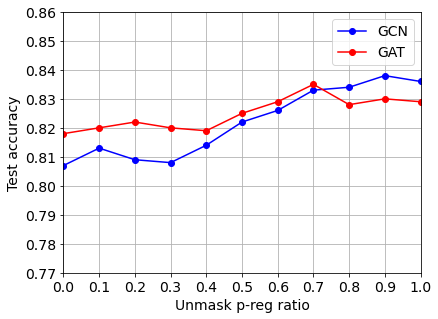

In [67]:
# fig2b
df = pd.read_csv('reports/figures/fig2b.csv')
# df = pd.DataFrame(metrics).sort_values(['unmask preg ratio'])
# df = df_
fig, ax = plt.subplots(figsize=(6.4,4.8))

filt = (df['model'] == 'gcn')
ax.plot(df[filt]['unmask preg ratio'], df[filt]['test_acc'], '-ob', label='GCN')

filt = (df['model'] == 'gat')
ax.plot(df[filt]['unmask preg ratio'], df[filt]['test_acc'], '-or', label='GAT')

ax.set(xlim=(.0, 1), ylim=(.77, .86), xlabel='Unmask p-reg ratio', ylabel='Test accuracy', xticks=df[filt]['unmask preg ratio'])
ax.grid(True)
ax.legend()
plt.show()

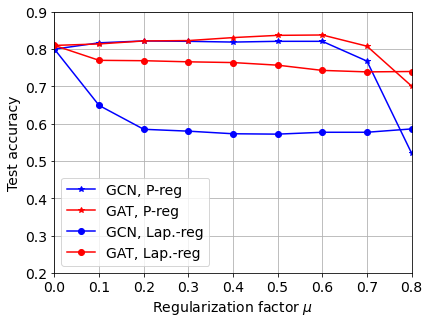

In [68]:
#fig2c
df = pd.read_csv('reports/figures/fig2c.csv')
fig, ax = plt.subplots(figsize=(6.4,4.8))
"""
filt = (df['model'] == 'gcn') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], 9*[df[filt]['test_acc'][df[filt]['mu']==0]], '--b', label='GCN')

filt = (df['model'] == 'gat') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], 9*[df[filt]['test_acc'][df[filt]['mu']==0]], '--r', label='GAT')
"""
filt = (df['model'] == 'gcn') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-*b', label='GCN, P-reg')

filt = (df['model'] == 'gat') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-*r', label='GAT, P-reg')

filt = (df['model'] == 'gcn') & (df['reg'] == 'lap_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-ob', label='GCN, Lap.-reg')

filt = (df['model'] == 'gat') & (df['reg'] == 'lap_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-or', label='GAT, Lap.-reg')

ax.set(xlim=(0, .8), ylim=(.2, .9), xlabel='Regularization factor $\mu$', ylabel='Test accuracy')
ax.legend()
ax.grid(True)
plt.show()

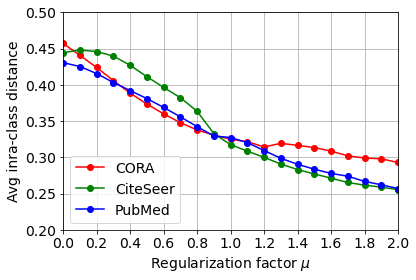

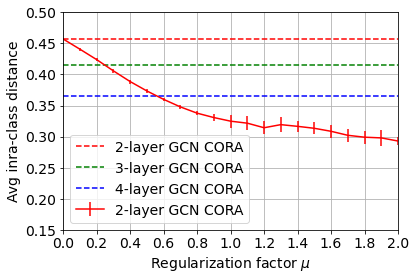

In [4]:
#Figure 4a

# No p-reg
avg = {'gcn2': 0.45696218609809874, 'gcn3': 0.41447475254535676, 'gcn4': 0.3654918760061264} 
std = {'gcn2': 0.0008677116672139958, 'gcn3': 0.006176764103304849, 'gcn4': 0.005563727960708383}

# p-reg
# Averages over 10 runs (result for the 21 values of mu)
df = pd.DataFrame()

df['gcn2_avg'] = [avg['gcn2']]*21
df['gcn3_avg'] = [avg['gcn3']]*21
df['gcn4_avg'] = [avg['gcn4']]*21

df['gcn2_std'] = [std['gcn2']]*21
df['gcn3_std'] = [std['gcn3']]*21
df['gcn4_std'] = [std['gcn4']]*21

df['CORA_icd_avg'] = np.array([
       0.45705609, 0.44068057, 0.42392568, 0.40580528, 0.38859277,
       0.37349125, 0.35993728, 0.34781604, 0.33772999, 0.3306765 ,
       0.32484859, 0.32162975, 0.31427673, 0.31926355, 0.31653419,
       0.31340207, 0.30856008, 0.30211442, 0.29905992, 0.29792962,
       0.29289907])

df['CiteSeer_icd_avg'] = np.array([
       0.44434615, 0.44805755, 0.44585984, 0.43964746, 0.4269895 ,
       0.41119443, 0.39653495, 0.38223248, 0.36351207, 0.33277066,
       0.31746428, 0.30860738, 0.29994913, 0.29073544, 0.28311565,
       0.27703494, 0.27126358, 0.26527361, 0.26160839, 0.25890491,
       0.25536839])

df['PubMed_icd_avg'] = np.array([
       0.43056056, 0.42526279, 0.4155225 , 0.40318009, 0.39215625,
       0.38095977, 0.36890268, 0.35579488, 0.34234079, 0.32940814,
       0.32734442, 0.32021845, 0.30937562, 0.29864772, 0.29042885,
       0.2836232 , 0.27781391, 0.27391982, 0.26677971, 0.26211005,
       0.2569183 ])

df['CORA_icd_std'] = np.array([
       0.00171448, 0.0023712 , 0.00269328, 0.00282229, 0.00320627,
       0.0028863 , 0.00299146, 0.00306489, 0.00314836, 0.00561812,
       0.01040725, 0.01143364, 0.01038625, 0.01235185, 0.00897441,
       0.00978077, 0.01054198, 0.01015949, 0.0107618 , 0.01280869,
       0.00627486])
df['CiteSeer_icd_std'] = np.array([
       0.00177197, 0.00102624, 0.00098925, 0.00145051, 0.00396101,
       0.00465231, 0.00518975, 0.0060058 , 0.00991378, 0.01712655,
       0.01708478, 0.01861667, 0.01587157, 0.01519512, 0.01423782,
       0.01341638, 0.01351745, 0.01290787, 0.01268725, 0.01262083,
       0.01111641])

mus = np.linspace(0,2,21)
xticks = np.linspace(0,2,11)
df['mus'] = mus

fig, ax = plt.subplots()

ax.plot(df['mus'], df['CORA_icd_avg'], '-or', label='CORA')
ax.plot(df['mus'], df['CiteSeer_icd_avg'], '-og', label='CiteSeer')
ax.plot(df['mus'], df['PubMed_icd_avg'], '-ob', label='PubMed')

ax.set(ylim=(.2, .5),
       xlim=(0,2), 
       xlabel='Regularization factor $\mu$', 
       ylabel='Avg inra-class distance', 
       xticks=xticks)
ax.grid(True)
ax.legend(loc='lower left')
plt.show()

fig, ax = plt.subplots()

ax.errorbar(df['mus'], df['CORA_icd_avg'], yerr=df['CORA_icd_std'], fmt='-r', ecolor='r', label='2-layer GCN CORA')

ax.plot(df['mus'], df['gcn2_avg'], '--r', label='2-layer GCN CORA')
ax.plot(df['mus'], df['gcn3_avg'], '--g', label='3-layer GCN CORA')
ax.plot(df['mus'], df['gcn4_avg'], '--b', label='4-layer GCN CORA')

ax.set(ylim=(.15, .5),
       xlim=(0,2), 
       xlabel='Regularization factor $\mu$', 
       ylabel='Avg inra-class distance', 
       xticks=xticks,)
ax.grid(True)
ax.legend(loc='lower left')
plt.show()



In [53]:
[df['gcn2_avg'][0]]

[0.45696218609809874]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


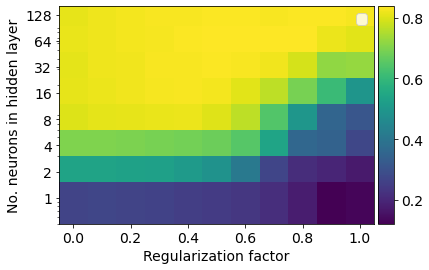

In [54]:
df = pd.read_csv('reports/figures/hidden_channels_mu.csv')

arr = np.zeros((df['hidden_channels'].unique().shape[0], df['mu'].unique().shape[0]))
for ind_i, i in enumerate(df['hidden_channels'].unique()):
    for ind_j, j in enumerate(df['mu'].unique()):
        arr[ind_i,ind_j] = df[(df['hidden_channels'] == i) & (df['mu'] == j)]['test_acc'].mean()

from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

fig, ax = plt.subplots()
im = ax.pcolormesh([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.], [1, 2, 4, 8, 16, 32, 64, 128], arr, )
ax.set_yscale('log')
ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128])
ax.set_yticklabels([1, 2, 4, 8, 16, 32, 64, 128])
add_colorbar(im, fig, ax)
ax.set(xlabel='Regularization factor', ylabel='No. neurons in hidden layer')
ax.legend()
plt.show()
